# Import Required Libraries


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import FIXME
from sklearn.preprocessing import FIXME
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error


#Load Dataset

In [3]:
df = pd.read_csv("FIXME")
df.head()


,area_sqft,rooms,distance_station_km,furnished,rent
0,450,1,1.2,1,22000
1,600,2,0.8,1,35000
2,500,1,2.5,0,18000
3,750,3,1.0,1,48000
4,400,1,3.0,0,15000


# Preprocessing

In [4]:
# Encode categorical columns if present
df = pd.get_dummies(df, drop_first=FIXME)

# Split features & target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# Train / Test Split

In [5]:
X_train, X_test, y_train, y_test = FIXME(
    X, y, test_size=0.2, random_state=42
)


# Scaling & Model Training

In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(FIXME)
X_test_scaled = scaler.transform(FIXME)

# Auto-detect problem type
if y.nunique() <= 2:
    model = LogisticRegression()
else:
    model = LinearRegression()

model.fit(X_train_scaled, FIXME)


LinearRegression()

# Model Evaluation

In [8]:
y_pred = model.predict(X_test_scaled)

if y.nunique() <= 2:
    print("Accuracy:", accuracy_score(FIXME, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, FIXME))
else:
    print("MAE:", mean_absolute_error(y_test, FIXME))
    print("MSE:", mean_squared_error(FIXME, y_pred))


MAE: 101.49700598801428
MSE: 10301.642224531006


# Model Visualization

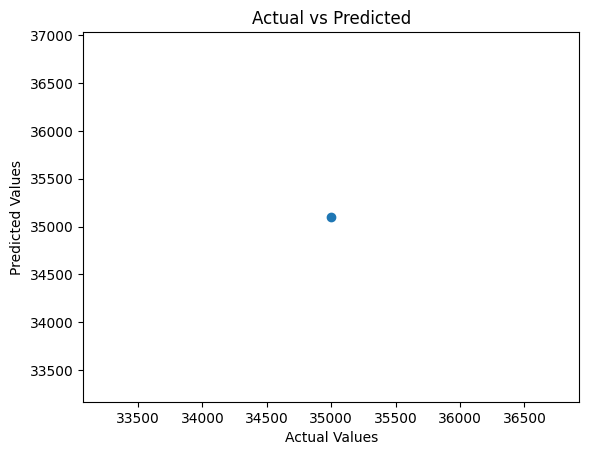

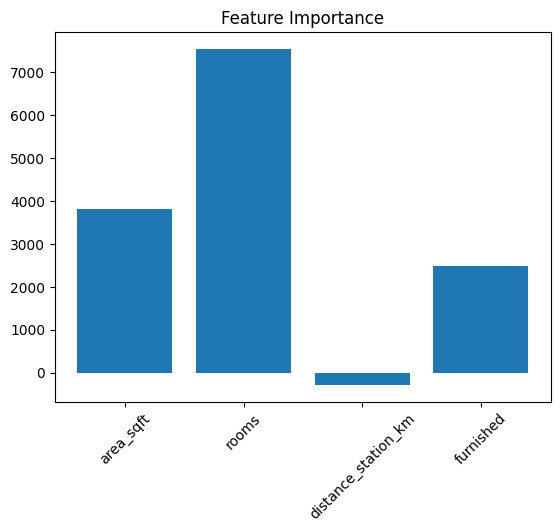

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# -----------------------------
# Table: Actual vs Predicted
# -----------------------------
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head()


if y.nunique() <= 2:
    # ===== CLASSIFICATION =====

    # Predicted probabilities
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], "--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # Prediction Confidence Distribution
    plt.hist(y_prob, bins=10)
    plt.title("Prediction Confidence Distribution")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Count")
    plt.show()

    # Feature Distribution (example: income)
    if "income" in df.columns:
        plt.hist(df["income"], bins=10, edgecolor="black")
        plt.title("Income Distribution")
        plt.xlabel("Income")
        plt.ylabel("Frequency")
        plt.show()

else:
    # ===== REGRESSION =====

    # Actual vs Predicted
    plt.scatter(y_test, y_pred)
    plt.title("Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

    # Feature Importance
    plt.bar(X.columns, model.coef_)
    plt.xticks(rotation=45)
    plt.title("Feature Importance")
    plt.show()
